 **Projeto 5** - Resilia + Ifood

Colaboradoras do projeto

* Aline Santos
* Inajá Morais

# **O que foi feito no semestre que foi realizado o curso do VAMOSAI**

Neste **Notebook** será apresentado diferente fontes de dados, sendo elas Youtube,Uber e Ifood. O objetivo do projeto é mostrar quais são nossos gostos pessoais e como tema optamos contar a nossa história baseado no tempo que estamos etudando no curso de análise de dados do vamosAI.

Para mais informações sobre as **bases de dados** finais desse projeto e a **visualização dos dados** via *Tableau*, acesse nosso [repositório](https://github.com/AlinesantosCS/projeto-ifood) no GitHub.

## Biblioteca



In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime
import plotly.express as px

## Localização

Importando a base de dados das viagens realizadas no *Uber*.

### Uber

In [ ]:
df_uber_localização = pd.read_csv('/content/drive/MyDrive/VAMOAI/Projeto/Aline/uber-data-aline/Rider/trips_data.csv')
df_uber_localização.head(10)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency
0,458,UberX,COMPLETED,2021-07-20 12:17:30,2021-07-20 12:27:33,-23.550228,-46.913440,"R. Sabiá, 294 - Jardim Nova Cotia, Itapevi - S...",2021-07-20 12:56:20,-23.563826,-46.845947,"R. Ribeirão Branco, 162 - Vila Anunciata, Cara...",6.96,22.96,BRL
1,458,UberX,COMPLETED,2021-07-19 20:23:32,2021-07-19 20:32:37,-23.541296,-46.937460,"Av. Presidente Vargas, 459 - Nova Itapevi - It...",2021-07-19 20:46:36,-23.555664,-46.913692,"R. dos Marinheiros, 49 - Chácara Santa Cecília...",2.79,16.05,BRL
2,458,UberX,COMPLETED,2021-07-19 19:43:44,2021-07-19 19:51:11,-23.550266,-46.913420,"R. Sabiá, 249 - Jardim Briquet, Itapevi - SP, ...",2021-07-19 20:01:55,-23.540855,-46.937996,"Av. Presidente Vargas, 459 - Nova Itapevi - It...",2.46,12.90,BRL
3,458,UberX,COMPLETED,2021-07-19 19:02:27,2021-07-19 19:06:30,-23.550062,-46.913530,"R. Cerro Corá, 22-36 - Jardim Nova Cotia, Jand...",2021-07-19 19:20:38,-23.541098,-46.937603,"Av. Presidente Vargas, 459 - Nova Itapevi - It...",3.45,12.91,BRL
4,458,UberX,COMPLETED,2021-07-19 11:09:19,2021-07-19 11:14:16,-23.550203,-46.913433,"R. Sabiá, 294 - Jardim Nova Cotia, Itapevi - S...",2021-07-19 11:24:10,-23.540842,-46.934456,"R. José Michelotti, 300 - Cidade Saúde - Itape...",2.37,17.93,BRL
5,458,UberX,COMPLETED,2021-07-13 10:48:27,2021-07-13 10:53:33,-23.550196,-46.913445,"R. Cerro Corá, 22-36 - Jardim Nova Cotia, Jand...",2021-07-13 11:04:08,-23.540527,-46.934020,"R. José Michelotti, 300 - Cidade Saúde - Itape...",2.41,16.92,BRL
6,458,UberX,COMPLETED,2021-07-06 13:25:11,2021-07-06 13:28:52,-23.550240,-46.913430,"R. Sabiá, 239 - Jardim Briquet, Itapevi - SP, ...",2021-07-06 13:38:15,-23.541317,-46.934628,"R. José Michelotti, 300 - Cidade da Saude, Ita...",2.32,9.96,BRL
7,458,UberX,COMPLETED,2021-06-28 09:40:54,2021-06-28 09:47:42,-23.555689,-46.913680,"R. dos Marinheiros, 141 - Chácara Santa Cecíli...",2021-06-28 09:51:57,-23.550110,-46.913490,"R. Cerro Corá, 22-36 - Jardim Nova Cotia, Jand...",0.62,13.91,BRL
8,458,UberX,COMPLETED,2021-06-23 12:27:44,2021-06-23 12:32:16,-23.550241,-46.913433,"R. Cerro Corá, 22-36 - Jardim Nova Cotia, Jand...",2021-06-23 12:40:41,-23.540565,-46.934105,"R. José Michelotti, 300 - Cidade da Saude, Ita...",2.15,10.99,BRL
9,458,UberX,COMPLETED,2021-06-21 09:57:55,2021-06-21 10:03:42,-23.550285,-46.913425,"R. Sabiá, 284 - Jardim Nova Cotia, Itapevi - S...",2021-06-21 10:22:31,-23.544302,-46.962883,"R. Jose Fratini, 14 - Vila Santa Flora, Itapev...",5.50,33.93,BRL


#### 1.1. Tratamento da base de dados

In [ ]:
df_uber_localização["Request Time"] = pd.to_datetime(df_uber_localização["Request Time"])
df_uber_localização ["Request day"] = df_uber_localização["Request Time"].dt.strftime("%Y-%m-%d")
df_uber_localização ["Request hour"] = df_uber_localização["Request Time"].dt.strftime("%H:%M:%S")

In [ ]:
df_dados_analise = df_uber_localização.drop(['City','Request Time','Product Type'], axis=1)

In [ ]:
df_ano_localização  = (df_dados_analise['Request day'] >= '2021-01-01') & (df_dados_analise['Request day'] <= '2021-07-20')
df_primeiro_semestre = df_dados_analise[df_ano_localização]

In [ ]:
df_primeiro_semestre = df_primeiro_semestre.drop(df_primeiro_semestre.loc[df_primeiro_semestre['Trip or Order Status'] == 'CANCELED'].index)
df_primeiro_semestre = df_primeiro_semestre.drop(df_primeiro_semestre.loc[df_primeiro_semestre['Trip or Order Status'] == 'DRIVER_CANCELED'].index)

In [ ]:
df_primeiro_semestre = df_primeiro_semestre.rename(columns={'Begin Trip Lat': 'begin_trip_lat_aline'})
df_primeiro_semestre = df_primeiro_semestre.rename(columns={'Begin Trip Lng': 'begin_trip_lng_aline'})
df_primeiro_semestre = df_primeiro_semestre.rename(columns={'Dropoff Lat': 'dropoff_lat_aline'})
df_primeiro_semestre = df_primeiro_semestre.rename(columns={'Dropoff Lng': 'dropoff_lng_aline'})
df_primeiro_semestre = df_primeiro_semestre.rename(columns={'Begin Trip Address': 'begin_trip_address_aline'})
df_primeiro_semestre = df_primeiro_semestre.rename(columns={'Dropoff Address': 'dropoff_address_aline'})
df_primeiro_semestre = df_primeiro_semestre.rename(columns={'Fare Amount': 'fare_amount_aline'})
df_primeiro_semestre = df_primeiro_semestre.rename(columns={'Request day': 'request_day_aline'})

In [ ]:
df_primeiro_semestre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Trip or Order Status      34 non-null     object 
 1   Begin Trip Time           34 non-null     object 
 2   begin_trip_lat_aline      34 non-null     float64
 3   begin_trip_lng_aline      34 non-null     float64
 4   begin_trip_address_aline  34 non-null     object 
 5   Dropoff Time              34 non-null     object 
 6   dropoff_lat_aline         34 non-null     float64
 7   dropoff_lng_aline         34 non-null     float64
 8   dropoff_address_aline     34 non-null     object 
 9   Distance (miles)          34 non-null     float64
 10  fare_amount_aline         34 non-null     float64
 11  Fare Currency             34 non-null     object 
 12  request_day_aline         34 non-null     object 
 13  Request hour              34 non-null     object 
dtypes: float64(6

In [ ]:
df_primeiro_semestre.drop(['Trip or Order Status', 'Begin Trip Time','Dropoff Time','Fare Currency','Request hour'], axis=1, inplace=True)

In [ ]:
df_primeiro_semestre.head(10)

,begin_trip_lat_aline,begin_trip_lng_aline,begin_trip_address_aline,dropoff_lat_aline,dropoff_lng_aline,dropoff_address_aline,Distance (miles),fare_amount_aline,request_day_aline
0,-23.550228,-46.913440,"R. Sabiá, 294 - Jardim Nova Cotia, Itapevi - S...",-23.563826,-46.845947,"R. Ribeirão Branco, 162 - Vila Anunciata, Cara...",6.96,22.96,2021-07-20
1,-23.541296,-46.937460,"Av. Presidente Vargas, 459 - Nova Itapevi - It...",-23.555664,-46.913692,"R. dos Marinheiros, 49 - Chácara Santa Cecília...",2.79,16.05,2021-07-19
2,-23.550266,-46.913420,"R. Sabiá, 249 - Jardim Briquet, Itapevi - SP, ...",-23.540855,-46.937996,"Av. Presidente Vargas, 459 - Nova Itapevi - It...",2.46,12.90,2021-07-19
3,-23.550062,-46.913530,"R. Cerro Corá, 22-36 - Jardim Nova Cotia, Jand...",-23.541098,-46.937603,"Av. Presidente Vargas, 459 - Nova Itapevi - It...",3.45,12.91,2021-07-19
4,-23.550203,-46.913433,"R. Sabiá, 294 - Jardim Nova Cotia, Itapevi - S...",-23.540842,-46.934456,"R. José Michelotti, 300 - Cidade Saúde - Itape...",2.37,17.93,2021-07-19
5,-23.550196,-46.913445,"R. Cerro Corá, 22-36 - Jardim Nova Cotia, Jand...",-23.540527,-46.934020,"R. José Michelotti, 300 - Cidade Saúde - Itape...",2.41,16.92,2021-07-13
6,-23.550240,-46.913430,"R. Sabiá, 239 - Jardim Briquet, Itapevi - SP, ...",-23.541317,-46.934628,"R. José Michelotti, 300 - Cidade da Saude, Ita...",2.32,9.96,2021-07-06
7,-23.555689,-46.913680,"R. dos Marinheiros, 141 - Chácara Santa Cecíli...",-23.550110,-46.913490,"R. Cerro Corá, 22-36 - Jardim Nova Cotia, Jand...",0.62,13.91,2021-06-28
8,-23.550241,-46.913433,"R. Cerro Corá, 22-36 - Jardim Nova Cotia, Jand...",-23.540565,-46.934105,"R. José Michelotti, 300 - Cidade da Saude, Ita...",2.15,10.99,2021-06-23
9,-23.550285,-46.913425,"R. Sabiá, 284 - Jardim Nova Cotia, Itapevi - S...",-23.544302,-46.962883,"R. Jose Fratini, 14 - Vila Santa Flora, Itapev...",5.50,33.93,2021-06-21


In [ ]:
divisao = df_primeiro_semestre['dropoff_address_aline'].str.split('SP')
endereco = divisao.str.get(0)
df_primeiro_semestre['dropoff_address_aline'] = endereco

In [ ]:
divisao = df_primeiro_semestre['dropoff_address_aline'].str.split('SP')
endereco = divisao.str.get(0)
df_primeiro_semestre['dropoff_address_aline'] = endereco

In [ ]:
divisao = df_primeiro_semestre['begin_trip_address_aline'].str.split('SP')
endereco = divisao.str.get(0)
df_primeiro_semestre['begin_trip_address_aline'] = endereco

In [ ]:
df_primeiro_semestre.head(5)

,begin_trip_lat_aline,begin_trip_lng_aline,begin_trip_address_aline,dropoff_lat_aline,dropoff_lng_aline,dropoff_address_aline,Distance (miles),fare_amount_aline,request_day_aline
0,-23.550228,-46.913440,"R. Sabiá, 294 - Jardim Nova Cotia, Itapevi -",-23.563826,-46.845947,"R. Ribeirão Branco, 162 - Vila Anunciata, Cara...",6.96,22.96,2021-07-20
1,-23.541296,-46.937460,"Av. Presidente Vargas, 459 - Nova Itapevi - It...",-23.555664,-46.913692,"R. dos Marinheiros, 49 - Chácara Santa Cecília...",2.79,16.05,2021-07-19
2,-23.550266,-46.913420,"R. Sabiá, 249 - Jardim Briquet, Itapevi -",-23.540855,-46.937996,"Av. Presidente Vargas, 459 - Nova Itapevi - It...",2.46,12.90,2021-07-19
3,-23.550062,-46.913530,"R. Cerro Corá, 22-36 - Jardim Nova Cotia, Jand...",-23.541098,-46.937603,"Av. Presidente Vargas, 459 - Nova Itapevi - It...",3.45,12.91,2021-07-19
4,-23.550203,-46.913433,"R. Sabiá, 294 - Jardim Nova Cotia, Itapevi -",-23.540842,-46.934456,"R. José Michelotti, 300 - Cidade Saúde - Itape...",2.37,17.93,2021-07-19


#### 1.2. Exploração das bases de dados

##### 1.2.1 - Lugares que mais visitados

###### Lugares que solicito como destino de viagem

In [ ]:
df_primeiro_semestre['dropoff_address_aline'].value_counts(dropna=False).head(10)

R. Sabiá, 290 - Jardim Nova Cotia, Itapevi - SP, 06655-250, Brasil                            3
R. Jose Fratini, 14 - Vila Santa Flora, Itapevi - SP, 06667, Brasil                           2
Av. Presidente Vargas, 459 - Nova Itapevi - Itapevi - SP, 06694-970                           2
R. José Michelotti, 300 - Cidade da Saude, Itapevi - SP, 06693-005, Brasil                    2
R. José Michelotti, 300 - Cidade Saúde - Itapevi - SP, 06693-005                              2
R. Sabiá, 190 - Jardim Briquet, Itapevi - SP, 06655-310, Brasil                               2
Av. Rubens Caramez, 264 - Centro, Itapevi - SP, 06657-000, Brasil                             2
Estr. Estadual Barueri-Itapevi, 788 - Parque Nova Jandira, Jandira - SP, 06624-000, Brasil    1
Rua Um, 139 - Chácara Santa Cecília, Itapevi - SP, 06655-720, Brasil                          1
R. Tapirapes, 59 - Jardim Belmont, Jandira - SP, 06608-040, Brasil                            1
Name: dropoff_address_aline, dtype: int6

###### Lugares que solicito como origem de viagem

In [ ]:
df_primeiro_semestre['begin_trip_address_aline'].value_counts(dropna=False).head(10)

R. Sabiá, 239 - Jardim Briquet, Itapevi -                      6
R. Sabiá, 290 - Jardim Nova Cotia, Itapevi -                   6
R. Sabiá, 294 - Jardim Nova Cotia, Itapevi -                   3
R. Cerro Corá, 22-36 - Jardim Nova Cotia, Jandira -            3
R. Sabiá, 253 - Jardim Briquet, Itapevi -                      2
R. dos Marinheiros, 141 - Chácara Santa Cecília, Itapevi -     2
R. Sabiá, 249 - Jardim Briquet, Itapevi -                      2
R. dos Marinheiros, 125 - Chácara Santa Cecília, Itapevi -     1
Av. Carmine Gragnano, 139 - Centro, Jandira -                  1
Rua Um, 122 - Chácara Santa Cecília, Itapevi -                 1
Name: begin_trip_address_aline, dtype: int64

###### Média de gastos

In [ ]:
df_primeiro_semestre['fare_amount_aline'].mean()

13.239411764705885

#### 1.3. Visualização das bases de dados - Uber

Como em 2021 os casos de Covid continuaram as saidas foram em menor valor, em geralmente esses endereços representas dois lugares residenciais que foram fequentadas.

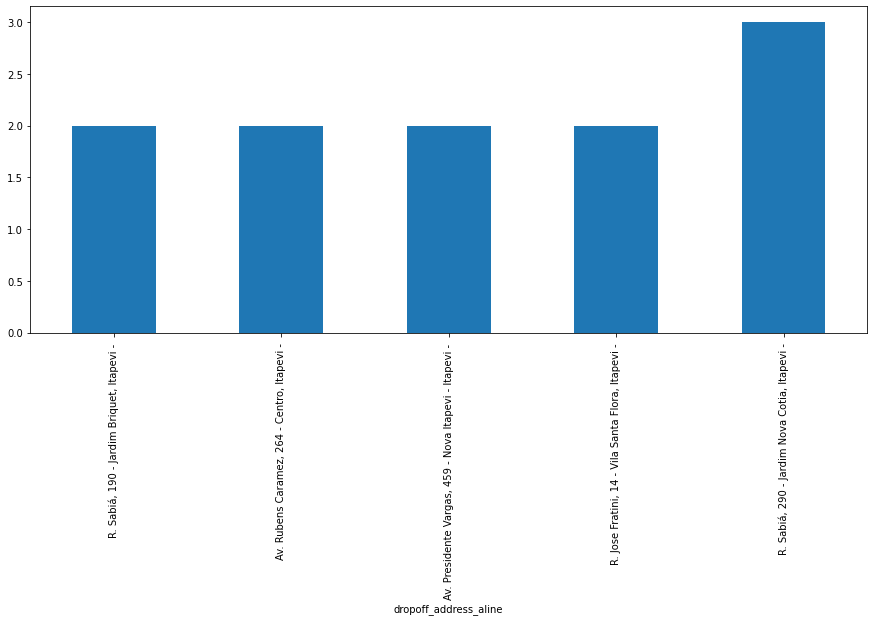

In [ ]:
df_primeiro_semestre.groupby(['dropoff_address_aline']).dropoff_address_aline.count().sort_values()[-5:].plot(kind='bar',figsize=(15,6))

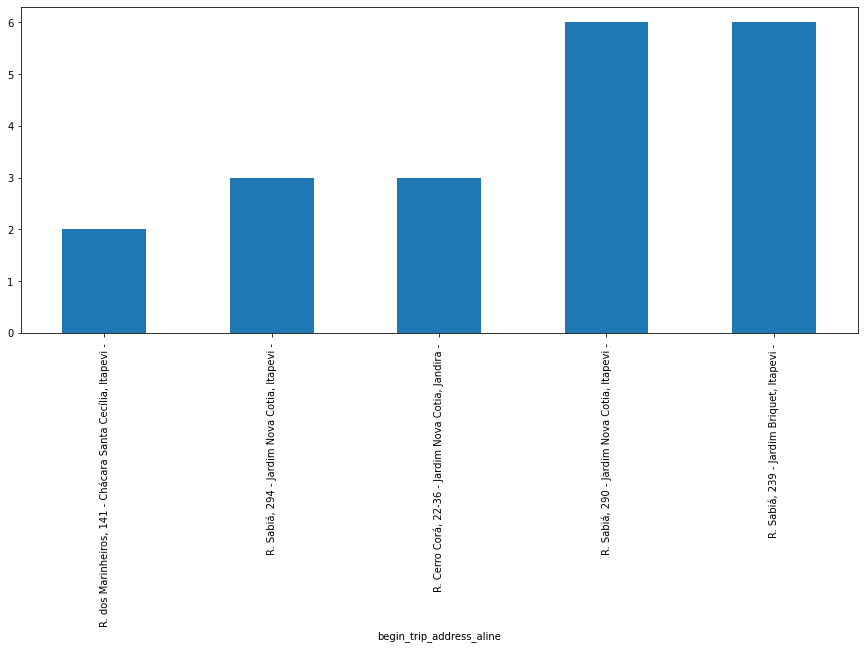

In [ ]:
df_primeiro_semestre.groupby(['begin_trip_address_aline']).dropoff_address_aline.count().sort_values()[-5:].plot(kind='bar',figsize=(15,6))

Os valores gastos deste semestre tem em médias treze reais e tendo picos de valores de quarenta e três reais.

In [ ]:
fig = px.line(
    df_primeiro_semestre, x='request_day_aline', y='fare_amount_aline',
    title='Quantidade gasta por dia de solicitação do Uber'
)
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Valor Gasto')

fig.show()

## Música


Importação da base dados de histórico de visualização do *Youtube*.

### Youtube

In [ ]:
df_musica_aline = pd.read_json('/content/drive/MyDrive/VAMOAI/Projeto/Aline/google-aline/Takeout/YouTube e YouTube Music/histórico/histórico-de-visualização.json')
df_musica_aline.head(10)

,header,title,titleUrl,subtitles,time,products,details,description
0,YouTube,Watched CNN TONIGHT: LUXÚRIA – 07/01/2021,https://www.youtube.com/watch?v=nEvL_D-L7yQ,"[{'name': 'CNN Tonight', 'url': 'https://www.y...",2021-07-20T14:10:32.692Z,[YouTube],NaN,NaN
1,YouTube,Watched CNN TONIGHT: PORNOGRAFIA – 25/02/2021,https://www.youtube.com/watch?v=SqgJGgpFmGw,"[{'name': 'CNN Tonight', 'url': 'https://www.y...",2021-07-20T13:17:10.035Z,[YouTube],NaN,NaN
2,YouTube,Watched CNN TONIGHT: CIÚMES – 12/11/2020,https://www.youtube.com/watch?v=4u4f3nQDBI8,"[{'name': 'CNN Tonight', 'url': 'https://www.y...",2021-07-20T12:28:52.039Z,[YouTube],NaN,NaN
3,YouTube,Watched CNN TONIGHT: HYPE DA ORGANIZAÇÃO – 11/...,https://www.youtube.com/watch?v=qMKzcrk0unw,"[{'name': 'CNN Tonight', 'url': 'https://www.y...",2021-07-20T11:24:05.820Z,[YouTube],NaN,NaN
4,YouTube,Watched CNN TONIGHT: ESPÍRITO ESPORTIVO – 04/0...,https://www.youtube.com/watch?v=QhBsGeuN18U,"[{'name': 'CNN Tonight', 'url': 'https://www.y...",2021-07-20T10:32:39.096Z,[YouTube],NaN,NaN
5,YouTube,Watched CNN TONIGHT: POR QUE PRECISAMOS DE GUR...,https://www.youtube.com/watch?v=joUe84GsPnc,"[{'name': 'CNN Tonight', 'url': 'https://www.y...",2021-07-20T10:23:58.346Z,[YouTube],NaN,NaN
6,YouTube,Watched FLOW PODCAST - Podpah #84,https://www.youtube.com/watch?v=ZtkaeDtXO-M,"[{'name': 'Podpah', 'url': 'https://www.youtub...",2021-07-20T02:36:46.286Z,[YouTube],NaN,NaN
7,YouTube,Watched THIAGO VENTURA - Podpah #12,https://www.youtube.com/watch?v=989cR-2KTqE,"[{'name': 'Podpah', 'url': 'https://www.youtub...",2021-07-20T00:39:44.626Z,[YouTube],NaN,NaN
8,YouTube,Watched EMICIDA - Podpah #171,https://www.youtube.com/watch?v=Q9qxREvAKz8,"[{'name': 'Podpah', 'url': 'https://www.youtub...",2021-07-19T23:51:54.199Z,[YouTube],NaN,NaN
9,YouTube,Watched Mais que 8 Minutos #052 (GAULES),https://www.youtube.com/watch?v=HGev4hZD18k,"[{'name': 'Rafi Bastos', 'url': 'https://www.y...",2021-07-19T14:16:55.528Z,[YouTube],NaN,NaN


#### 2.1. Tratamento da base de dados

In [ ]:
df_musica_aline = df_musica_aline.rename(columns={'title': 'title_aline'})

In [ ]:
df_musica_aline["time"] = pd.to_datetime(df_musica_aline["time"])
df_musica_aline["day_youtube_aline"] = df_musica_aline["time"].dt.strftime("%Y-%m-%d")
df_musica_aline["hour"] = df_musica_aline["time"].dt.strftime("%H:%M:%S")

In [ ]:
df_musica_semestre  = (df_musica_aline["day_youtube_aline"] >= '2021-01-01') & (df_musica_aline["day_youtube_aline"] <= '2021-07-20')
df_primeiro_semestre_musica = df_musica_aline[df_musica_semestre]

In [ ]:
df_primeiro_semestre_musica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4707 entries, 0 to 4706
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   header             4707 non-null   object             
 1   title_aline        4707 non-null   object             
 2   titleUrl           4703 non-null   object             
 3   subtitles          4603 non-null   object             
 4   time               4707 non-null   datetime64[ns, UTC]
 5   products           4707 non-null   object             
 6   details            89 non-null     object             
 7   description        0 non-null      object             
 8   day_youtube_aline  4707 non-null   object             
 9   hour               4707 non-null   object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 404.5+ KB


In [ ]:
df_primeiro_semestre_musica.shape[0]

4707

In [ ]:
df_primeiro_semestre_musica.drop(['header', 'titleUrl','subtitles','products','description','description','hour','time','details'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_primeiro_semestre_musica = df_primeiro_semestre_musica.drop(df_primeiro_semestre_musica.loc[df_primeiro_semestre_musica['title_aline'] == 'Watched https://www.youtube.com/watch?v=hg14Ocs03xA'].index)
df_primeiro_semestre_musica = df_primeiro_semestre_musica.drop(df_primeiro_semestre_musica.loc[df_primeiro_semestre_musica['title_aline'] == 'Watched a video that has been removed'].index)

In [ ]:
divisao = df_primeiro_semestre_musica['title_aline'].str.split('Watched')
musica = divisao.str.get(1)
df_primeiro_semestre_musica['title_aline'] = musica

#### 2.2. Exploração das bases de dados

##### 2.2.1 - Os últimos videos assistidos 

Na data do dia 20 de julho de 2021 que consiste em programas do canal de televisão da CNN que foram gravados e postados no canal oficial da CNN no Youtube.

In [ ]:
df_primeiro_semestre_musica.head(10)

,title_aline,day_youtube_aline
0,Watched CNN TONIGHT: LUXÚRIA – 07/01/2021,2021-07-20
1,Watched CNN TONIGHT: PORNOGRAFIA – 25/02/2021,2021-07-20
2,Watched CNN TONIGHT: CIÚMES – 12/11/2020,2021-07-20
3,Watched CNN TONIGHT: HYPE DA ORGANIZAÇÃO – 11/...,2021-07-20
4,Watched CNN TONIGHT: ESPÍRITO ESPORTIVO – 04/0...,2021-07-20
5,Watched CNN TONIGHT: POR QUE PRECISAMOS DE GUR...,2021-07-20
6,Watched FLOW PODCAST - Podpah #84,2021-07-20
7,Watched THIAGO VENTURA - Podpah #12,2021-07-20
8,Watched EMICIDA - Podpah #171,2021-07-19
9,Watched Mais que 8 Minutos #052 (GAULES),2021-07-19


##### 2.2.2 - Os videos que foram tocados mais vezes

Os videos que foram repetidamente assistidos foram videos relacionado a música.

In [ ]:
df_primeiro_semestre_musica['title_aline'].value_counts(dropna=False).head(10)

 The Weeknd - Save Your Tears (Official Music Video)          37
 No Role Modelz                                               32
 Childish Gambino - Redbone (Official Audio)                  26
 Passionfruit                                                 24
 The Weeknd - Often (NSFW) (Official Video)                   22
 Joji - SLOW DANCING IN THE DARK                              21
 Liniker - Zero                                               20
 The Weeknd - Call Out My Name (Official Video)               19
 Money Trees                                                  18
 Tame Impala - The Less I Know the Better (Official Audio)    18
Name: title_aline, dtype: int64

#### 2.3. Visualização das bases de dados - Youtube

Os videos mais tocados no meu Youtube foi The Weeknd com a música Save Your Tears, por isso essa base dados foi usado com principal objetivo mostrar o gosto musical porque o uso do Youtube está relacionado a ouvir música.

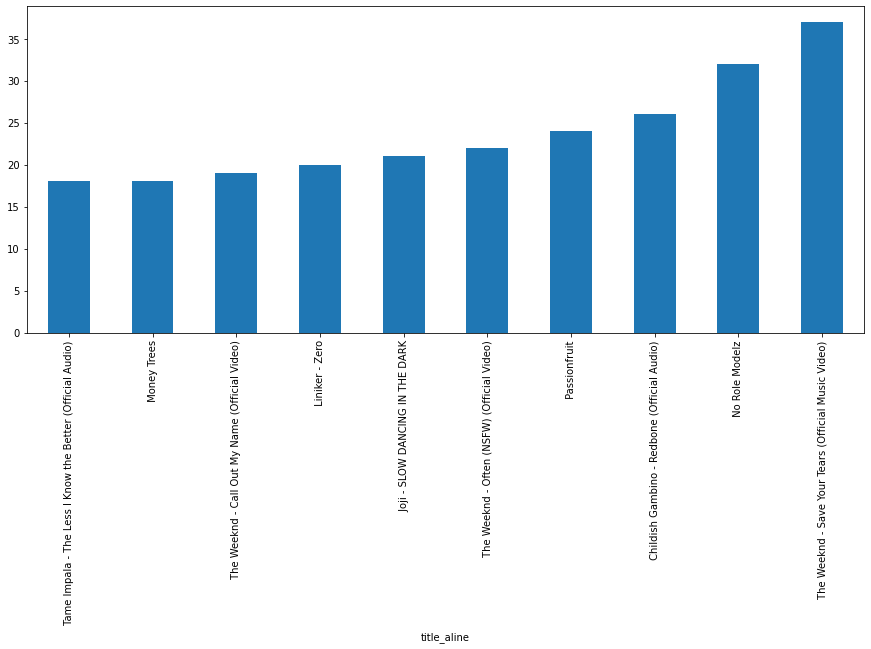

In [ ]:
df_primeiro_semestre_musica.groupby(['title_aline']).title_aline.count().sort_values()[-10:].plot(kind='bar',figsize=(15,6))

##Comida

Importação de dados dos pedidos realizados no *Ifood*.

### Ifood

In [ ]:
df_comida_aline = pd.read_csv('/content/drive/MyDrive/VAMOAI/Projeto/Aline/ifood-aline/pedidos..csv')
df_comida_aline.head(10)

,id_usuario,id_pedido,restaurante,valor,status,data_registro,data_pedido
0,a7f5988e-f7a5-4aa8-a57c-160d394d030e,220248193,Etc E Tal Hamburgueria E Acai,51.30,CONCLUDED,2018-04-07,2018-04-29
1,a7f5988e-f7a5-4aa8-a57c-160d394d030e,238569504,Etc E Tal Hamburgueria E Acai,53.80,CONCLUDED,2018-04-07,2018-06-10
2,a7f5988e-f7a5-4aa8-a57c-160d394d030e,382844319,Pizzaria Saborella 1,30.90,CONCLUDED,2018-04-07,2018-12-25
3,a7f5988e-f7a5-4aa8-a57c-160d394d030e,262535788,Etc E Tal Hamburgueria E Acai,55.90,CONCLUDED,2018-04-07,2018-07-24
4,a7f5988e-f7a5-4aa8-a57c-160d394d030e,315497238,Etc E Tal Hamburgueria E Acai,46.40,CONCLUDED,2018-04-07,2018-10-14
5,a7f5988e-f7a5-4aa8-a57c-160d394d030e,257453706,Etc E Tal Hamburgueria E Acai,54.90,CONCLUDED,2018-04-07,2018-07-15
6,a7f5988e-f7a5-4aa8-a57c-160d394d030e,240711068,Pizzaria Saborella 1,33.90,CONCLUDED,2018-04-07,2018-06-14
7,a7f5988e-f7a5-4aa8-a57c-160d394d030e,239590041,Etc E Tal Hamburgueria E Acai,38.90,CONCLUDED,2018-04-07,2018-06-12
8,a7f5988e-f7a5-4aa8-a57c-160d394d030e,239578207,Ponto Do Yakissoba,28.99,CONCLUDED,2018-04-07,2018-06-12
9,a7f5988e-f7a5-4aa8-a57c-160d394d030e,295587076,Etc E Tal Hamburgueria E Acai,47.40,CANCELLED,2018-04-07,2018-09-17


#### 3.1. Tratamento da base de dados

In [ ]:
df_alimentacao  = (df_comida_aline['data_pedido'] >= '2021-01-01') & (df_comida_aline['data_pedido'] <= '2021-07-20')
df_alimentacao_semestre = df_comida_aline[df_alimentacao]

In [ ]:
df_alimentacao_semestre = df_alimentacao_semestre.rename(columns={'restaurante': 'restaurante_aline'})
df_alimentacao_semestre = df_alimentacao_semestre.rename(columns={'valor': 'valor_aline'})

In [ ]:
df_alimentacao_semestre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 13 to 26
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_usuario         11 non-null     object 
 1   id_pedido          11 non-null     int64  
 2   restaurante_aline  11 non-null     object 
 3   valor_aline        11 non-null     float64
 4   status             11 non-null     object 
 5   data_registro      11 non-null     object 
 6   data_pedido        11 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 704.0+ bytes


In [ ]:
df_alimentacao_semestre.drop(['id_usuario', 'id_pedido','status','data_registro'], axis=1, inplace=True)

In [ ]:
df_alimentacao_semestre.reset_index(drop=True)

,restaurante_aline,valor_aline,data_pedido
0,Brothers Hamburgueria,58.00,2021-02-08
1,Simone Refeicao,18.89,2021-01-14
2,Restaurante Da Simone,8.99,2021-04-30
3,Subway Itapevi - Centro,34.49,2021-05-28
4,Subway Itapevi - Centro,34.49,2021-05-28
5,Ra Burger,27.99,2021-01-27
6,Ra Burger,99.00,2021-04-18
7,Adega Oliveira,48.92,2021-05-02
8,Lopes Supermercados - Itapevi,68.71,2021-07-03
9,Subway - Itapevi,55.89,2021-05-29


#### 3.2. Exploração das bases de dados

##### 3.2.1 - Os restaurantes mais pedidos no Ifood

In [ ]:
df_alimentacao_semestre['restaurante_aline'].value_counts(dropna=False).head(10)

Ra Burger                        2
Subway Itapevi - Centro          2
Simone Refeicao                  1
Lopes Supermercados - Itapevi    1
Restaurante Da Simone            1
Adega Oliveira                   1
Subway - Itapevi                 1
Pizzaria Saborella 1             1
Brothers Hamburgueria            1
Name: restaurante_aline, dtype: int64

##### 3.2.2 - Médias de gastos

In [ ]:
df_alimentacao_semestre['valor_aline'].mean()

44.47

#### 3.3. Visualização das bases de dados - Ifood

é possivel observar que os preços variam bastante com o tempo chegando ao pico de cem reais.

In [ ]:
fig = px.line(
    df_alimentacao_semestre, x='data_pedido', y='valor_aline',
    title='Valor dos pedidos no primeiro semestre de 2021'
)
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Valor Gasto')

fig.show()